
> Zhao Ma
>
> 5/20/2019

# Analysis of Wine Quality

### Introduction

Let's step into the shoes of a winemaking company looking to experiment and create a top-quality red or white wine. Luckily, some scientists were able to clean and procure a dataset of red and white wines, with chemical composition information and the result of a sensory experiment on each wine's quality. What can we learn from this data given to us? 

Here were some of my initial questions:
- What does the dataset tell us about what red and white wines are made of and their relationships?
- What properties of red and white wine are strong predictors of its quality?
    - If I feed my model all of the properties of my new experimental wine, what quality can I expect?

#### What does the data look like?
Columns include:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality 

#### Methods
First, I will understand the data a little better (what is missing, distribution, and correlations). Since we are trying to predict quality from a set of elements, I plan to use python classification packages. 

In [ ]:
#Import dependencies and packages for analysis
import pandas as pd #pandas has very useful data structures
import numpy as np #numpy supports pandas
import seaborn as sns #seaborn for visualization
import matplotlib.pyplot as plt #matplotlib for plotting

'''
seems like a classification problem (good quality vs bad quality), 
so I'm importing some basic classifiers, as we dive into the data more, we can try other ones like neural networks, 
if there is a lot of data
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

#cross-validation will be important along the way as we do training and test sets for more robust hyper-parameters
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 


### Exploratory Analysis

In [ ]:
#Read both sets of data for analysis
red = pd.read_csv('./input/winequality-red.csv')
white = pd.read_csv('./input/winequality-white.csv')

print('Red Wine Data Dimension:')
print('Number of Records:', red.shape[0])
print('Number of Features:', red.shape[1])
print()
print('White Wine Data Dimension:')
print('Number of Records:', white.shape[0])
print('Number of Features:', white.shape[1])

Red Wine Data Dimension:
Number of Records: 1599
Number of Features: 12

White Wine Data Dimension:
Number of Records: 4898
Number of Features: 12


Interesting, so there are more information on white wine than on red wine - an important information to note as we choose our classification tools. Let's double check whether both datasets are complete and numerical

In [ ]:
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


With the same columns in winequality-white.csv, we should note that only the 'quality' is an int64 in both datasets, with float64 for all the other columns. There are also no missing data (no null values), so this is a very clean dataset! Now let's check some basic distribution for the data:

In [ ]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Just from looking at this raw analysis:
- Scales are different for columns (some are in the $10^{-1}$ like volatile acidity, while others like total sulfur dioxide is in the $10^{2}$)
- White wine has some big differences in content compared to red wine - such as total sulfur dioxide is much higher in white wine compared to red wine
- The skewedness doesn't seem too large in any of the columns
Let's look into skewedness deeper:

In [ ]:
print("Red Wine Skewedness per Column")
print(red.skew())
print()
print("White Wine Skewedness per Column")
print(white.skew())

Red Wine Skewedness per Column
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

White Wine Skewedness per Column
fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64


Interesting, so the everything is skewed toward the right slightly. Chlorides are skewed even more so. The skewedness might be considered as we further dive into the data.

#### Which features of the wines correlate with the eachother?

To answer this question, I am going to use a Correlogram to observe the relationship between every parameter (since there are only 12).

Here it is for Red Wine:

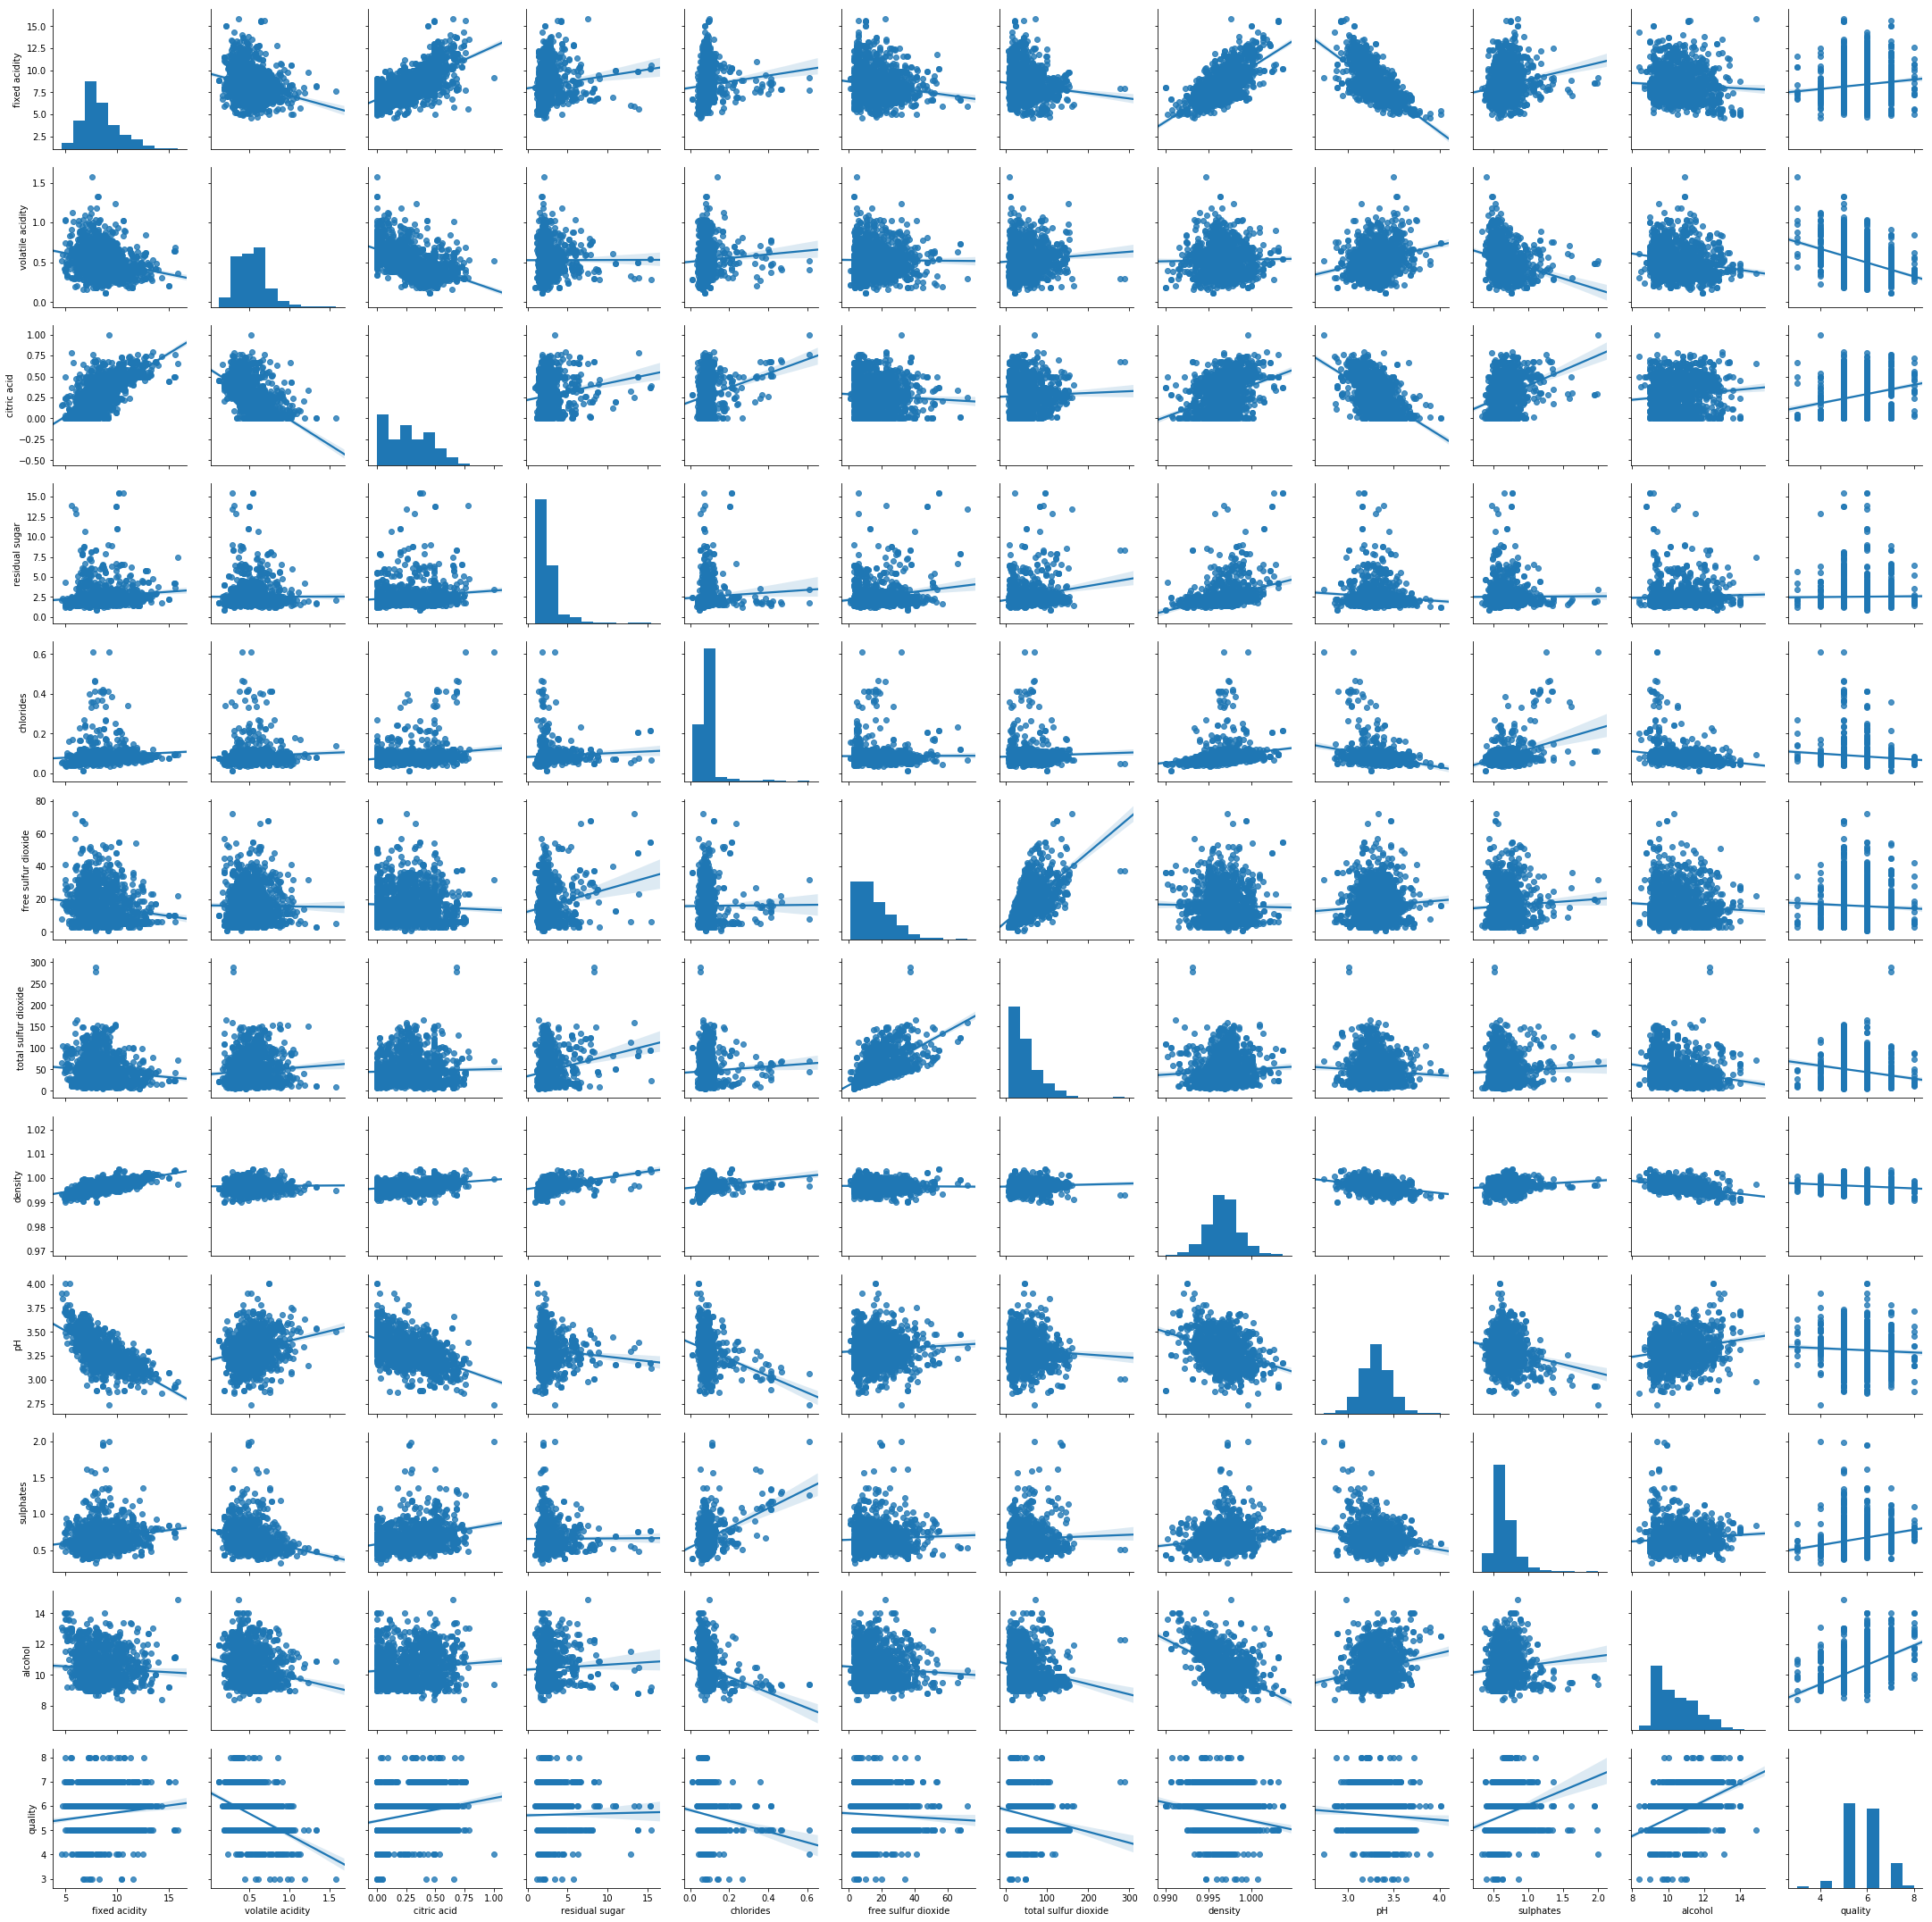

In [ ]:
sns.pairplot(red, kind="reg")
plt.show()

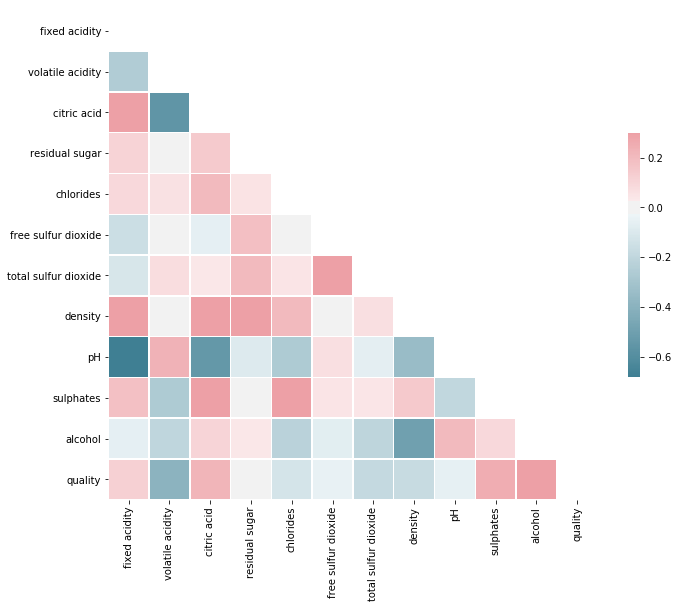

In [ ]:
#correlation strength (negative or positive)
corr = red.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask =mask, cmap = cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Here are some takeaways from the correlogram visually in terms of quality (though there are some interesting strong correlations between features outside quality e.g. positive relationship between density and fixed acidity):
- positive trend as sulphates increase
- positive trend as alcohol increases
- slight positive trend as fixed acidity increases
- slight positive trend as citric acid increases
- no trend between quality and residual sugar
- slight negative to no trend as free sulfur dioxide increases
- slight negative to no trend as pH increases
- slight negative trend as total sulfur dioxide increases
- slight negative trend as density increases
- slight negative trend as chlorides increases
- negative trend as volatile acidity increases


And for White Wines:

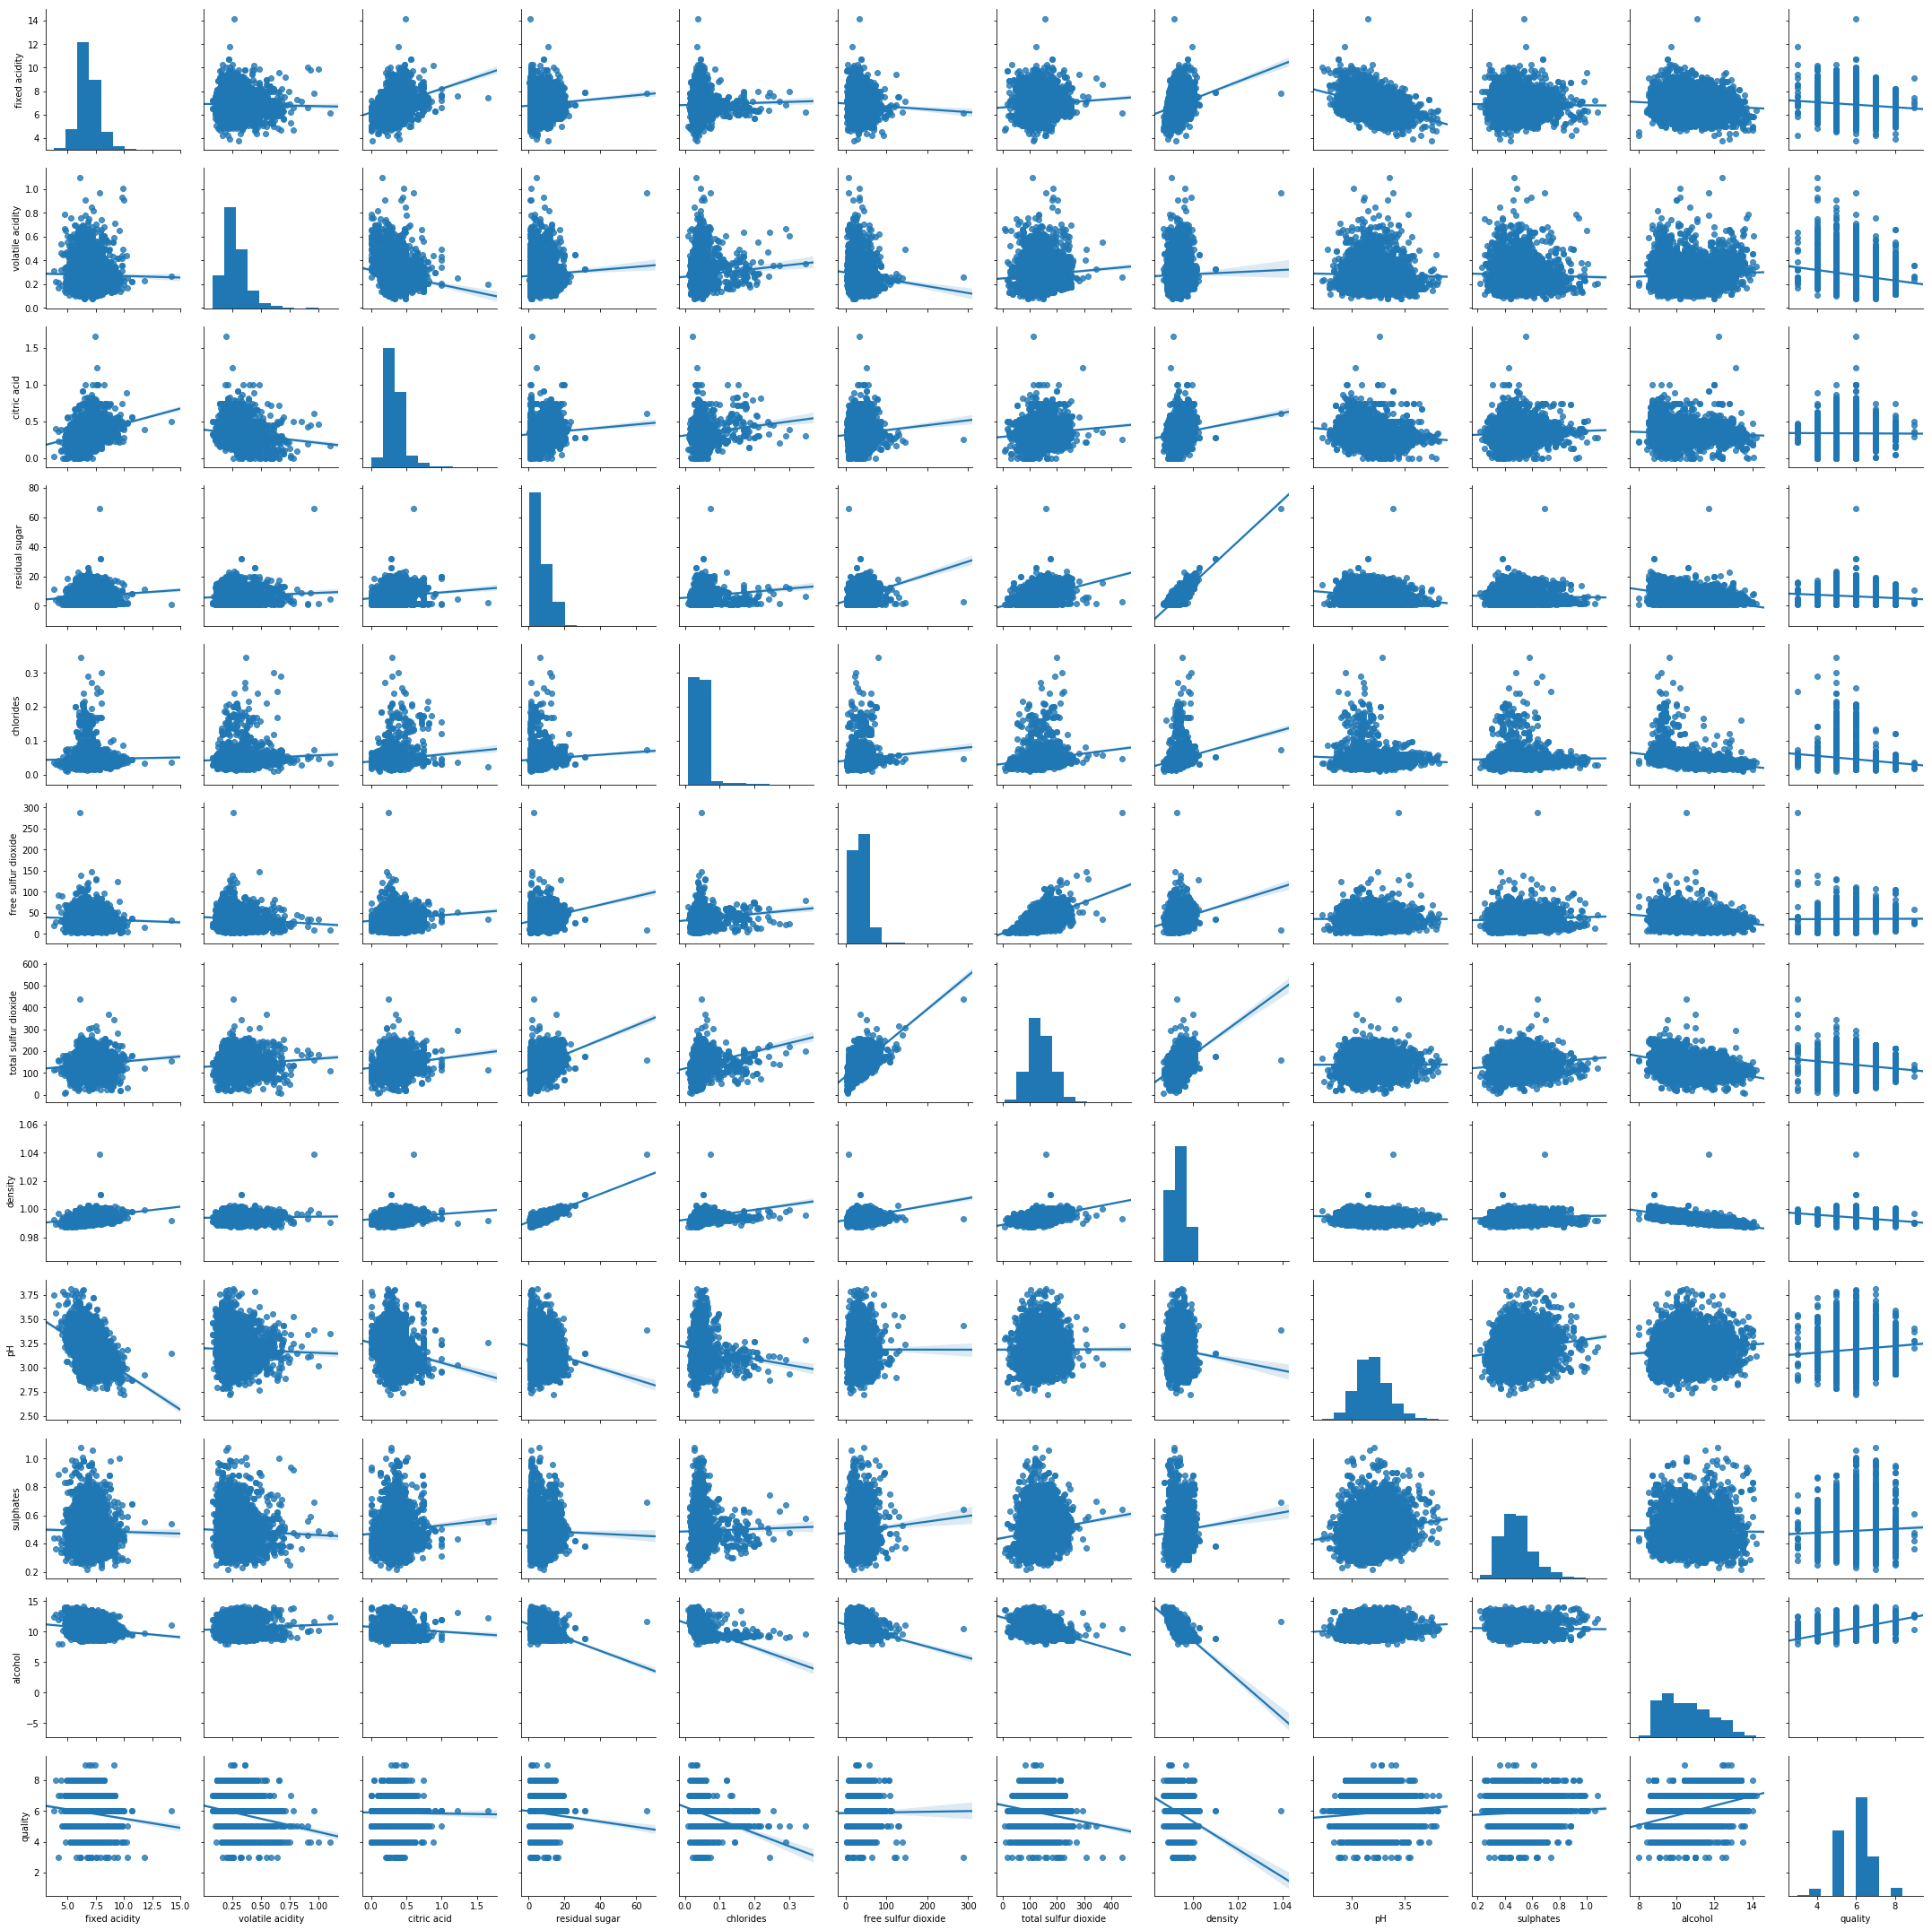

In [ ]:
sns.pairplot(white, kind="reg")
plt.show()

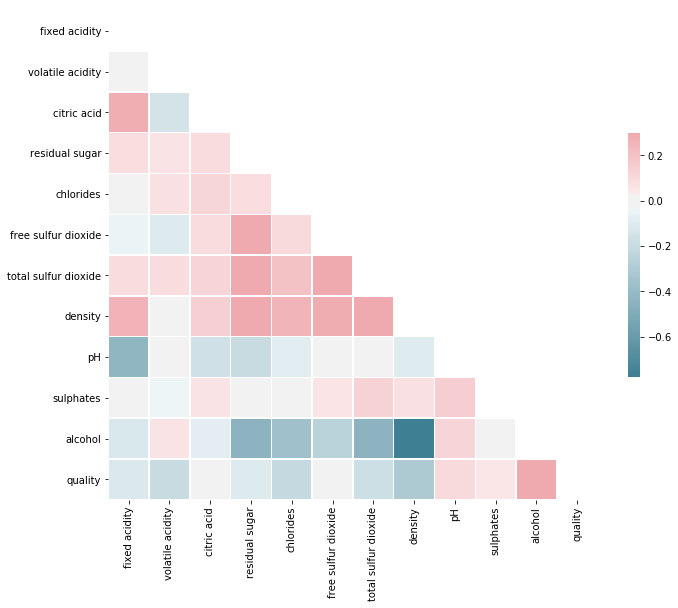

In [ ]:
corr = white.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask =mask, cmap = cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Takeaways:
- positive trend as alcohol increases
- slight positive trend as pH increases
- slight positive trend as sulphates increase
- no trend as citric acid increases
- no trend as free sulfur dioxide increases
- slight negative trend as fixed acidity increases
- slight negative trend as volatile acidity increases
- slight negative trend as residual sugar increases
- slight negative trend as total sulfur dioxide increases
- slight negative trend as chlorides increase
- negative trend as density decreases

Overall, there is a positive trend in both wines for alcohol, and residual sugar seems to have no effect.

*NOTE: Importantly, these "findings" are visually based off of the linear regression lines and the correlational values in the data. A more robust data-fitting analysis will be needed for each of the features. Due to the lack of time, I think these plots will do. The r values for the linear regressions are pretty bad, so it is a sad generalization.*

#### A closer look at quality, the output

With a basic look at the data, let's understand the quality of both red and white wine even further. What is the quality distribution for both types of wines? If we are a winemaker looking to make a new product in either red or white wine, maybe we can decide from here

Distribution of Quality for Red Wines
quality =  3
0.63 %
quality =  4
3.31 %
quality =  5
42.59 %
quality =  6
39.90 %
quality =  7
12.45 %
quality =  8
1.13 %


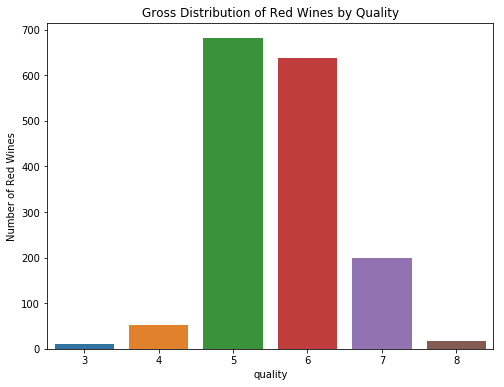

In [ ]:
red_class_dist = red.groupby('quality').size()

print("Distribution of Quality for Red Wines")

red_class_label = pd.DataFrame(red_class_dist,columns=['Number of Red Wines'])
plt.figure(figsize =( 8,6))
sns.barplot(x = red_class_label.index, y ='Number of Red Wines', data = red_class_label).set_title("Gross Distribution of Red Wines by Quality")

for i,number in enumerate(red_class_dist):
    percent=(number/red_class_dist.sum())*100
    print('quality = ',red_class_dist.index[i])
    print('%.2f'% percent,'%')

Distribution of Quality for White Wines
quality =  3
0.41 %
quality =  4
3.33 %
quality =  5
29.75 %
quality =  6
44.88 %
quality =  7
17.97 %
quality =  8
3.57 %
quality =  9
0.10 %


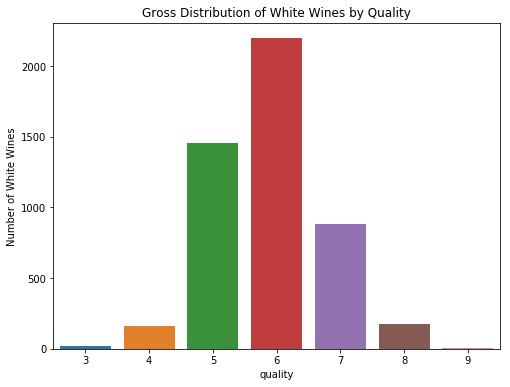

In [ ]:
white_class_dist = white.groupby('quality').size()

print("Distribution of Quality for White Wines")

white_class_label = pd.DataFrame(white_class_dist,columns=['Number of White Wines'])
plt.figure(figsize = (8,6))
sns.barplot(x = white_class_label.index, y = 'Number of White Wines', data = white_class_label).set_title("Gross Distribution of White Wines by Quality")

for i,number in enumerate(white_class_dist):
    percent=(number/white_class_dist.sum())*100
    print('quality = ',white_class_dist.index[i])
    print('%.2f'% percent,'%')


Most wines have either a quality of 5 or 6. With white wines having slightly more 6, 7, 8, and 9s than red wines

### Predicting Wine Quality

The most interesting part of my questions were about predicting whether a wine is good or not through its features. As we have seen in the previous analysis with regression, there are some interesting trends. Furthermore, wines tended to be average rather than poor or superior. To predict wine quality through classification algorithms, let's repurpose the quality score into three categories: poor, average, or great. Our goal is create a model to predict a great wine.
For all wines: let's let 1-4 stand for poor, 5 and 6 for average, 7-10 for great

In [ ]:
bins = [1, 4, 6, 10]
group_names = ['poor', 'average', 'great']
red_encoded = pd.cut(red['quality'], bins = bins, labels = group_names)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#I am going to use one-hot encoding to begin the classification task

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax

label_quality = LabelEncoder()
integer_encoded = label_quality.fit_transform(red_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)



In [ ]:
red['poor'] = onehot_encoded[:,2]
red['average'] = onehot_encoded[:,0]
red['great'] = onehot_encoded[:,1]

In [ ]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,poor,average,great
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.0,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0,1.0,0.0


For White Wines:

In [ ]:
bins = [1, 4, 6, 10]
group_names = ['poor', 'average', 'great']
white_encoded = pd.cut(white['quality'], bins = bins, labels = group_names)
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
label_quality = LabelEncoder()
integer_encoded = label_quality.fit_transform(white_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [ ]:
white['poor'] = onehot_encoded[:,2]
white['average'] = onehot_encoded[:,0]
white['great'] = onehot_encoded[:,1]

In [ ]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,poor,average,great
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0,1.0,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0,1.0,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0,1.0,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0,1.0,0.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0,1.0,0.0


I am interested in 'great' wines, so I only care about the 'great' column. I will now separate the dataset into feature and response variables. I also remove features that were found to be not very correlational.

In [ ]:
X = red.drop(['residual sugar', 'free sulfur dioxide', 'pH', 'quality', 'poor', 'average', 'great'], axis = 1)
y = red['great']

X2 = white.drop(['citric acid', 'free sulfur dioxide', 'quality', 'poor', 'average', 'great'], axis = 1)
y2 = white['great']

In [ ]:
# Split all data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3, random_state=32)

#### K-Nearest Neighbors Analysis

Let's try the K-Nearest Neighbors because of the small amount data.

For Red Wine:

In [ ]:
#Setup arrays to store training and test accuracies, from Forest Cover Walkthrough, see references
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

Text(0,0.5,'Accuracy')

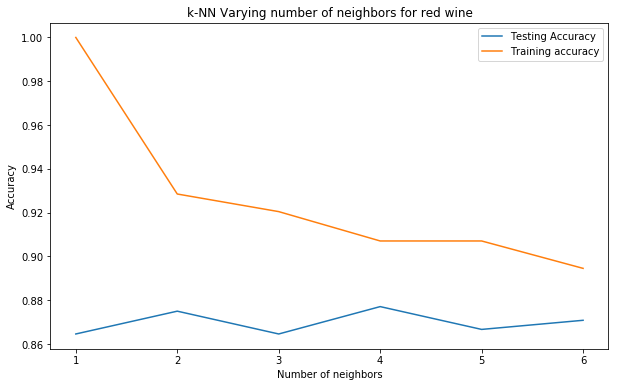

In [ ]:
#Generate plot
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors for red wine')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

So 4 neighbors seem to work as well as 2 neighbors. But, visuals are not good enough here. I am going to tune the hyperparameters (the k) with GridSearch for a odd k between 0 and 29:

In [ ]:
knnparams = {"n_neighbors": np.arange(1,31,2), "metric": ["euclidean", "cityblock"]}

In [ ]:
grid = GridSearchCV(knn, knnparams)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]), 'metric': ['euclidean', 'cityblock']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
print("Training accuracy is: ", str("{:.2f}".format(grid.score(X_train, y_train) * 100)), "%")
print("Test accuracy is: ",str("{:.2f}".format(grid.score(X_test, y_test) * 100)), "%")

Training accuracy is:  90.88 %
Test accuracy is:  87.29 %


In [ ]:
print(grid.best_params_)

{'metric': 'cityblock', 'n_neighbors': 5}


For White Wine:

In [ ]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn2 = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn2.fit(X2_train, y2_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn2.score(X2_train, y2_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn2.score(X2_test, y2_test) 

Text(0,0.5,'Accuracy')

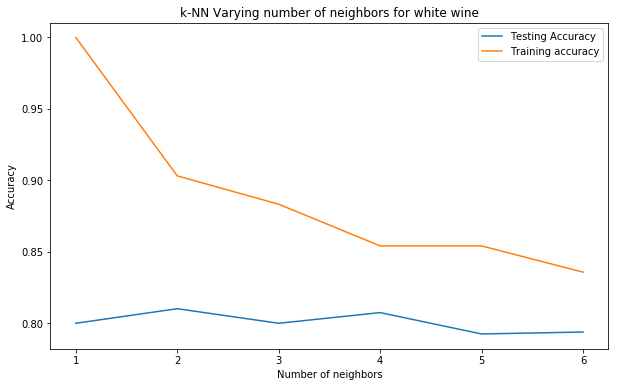

In [ ]:
#Generate plot
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors for white wine')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
grid2 = GridSearchCV(knn2, knnparams)
grid2.fit(X2_train, y2_train)
print("Training accuracy is: ", str("{:.2f}".format(grid2.score(X2_train, y2_train) * 100)), "%")
print("Test accuracy is: ",str("{:.2f}".format(grid2.score(X2_test, y2_test) * 100)), "%")
print(grid2.best_params_)

Training accuracy is:  80.05 %
Test accuracy is:  78.57 %
{'metric': 'cityblock', 'n_neighbors': 27}


There are other models that exist, and I will just briefly explore them here:

In [ ]:
from sklearn.metrics import accuracy_score

final_scores = []
models = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
titles = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(models)):
    model = models[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    final_scores.append(accuracy_score(pred , y_test))

In [ ]:
d = { "Algorithm" : titles, "Accuracy" : final_scores}

dfm = pd.DataFrame(d)
dfm



,Algorithm,Accuracy
0,LinearSVC,0.872917
1,DecisionTreeClassifier,0.877083
2,LogisticRegression,0.872917
3,RandomForestClassifier,0.906250
4,GradientBoostingClassifier,0.893750


For white wines:

In [ ]:
final_scores2 = [] 

for i in range(0,len(models)):
    model = models[i]
    model.fit( X2_train , y2_train )
    pred = model.predict(X2_test)
    final_scores2.append(accuracy_score(pred , y2_test))

In [ ]:
d = { "Algorithm" : titles, "Accuracy" : final_scores2}

dfm = pd.DataFrame(d)
dfm

,Algorithm,Accuracy
0,LinearSVC,0.790476
1,DecisionTreeClassifier,0.808163
2,LogisticRegression,0.807483
3,RandomForestClassifier,0.858503
4,GradientBoostingClassifier,0.825170


In both cases, the RandomForestClassifier produced the best results - for next steps, I would look into cross-validating the Random Forest Model.

### Conclusion

Through an exploratory analysis, we were able to find factors that correlate well with wine quality for both red and white wine. Furthermore, we were able to do a brief analysis on machine learning models that could predict the quality of red wine at around 90% accuracy and quality of white wine at 84% accuracy. There are many parameters in this analysis that could be improved:

- The correlational / regression exploratory analysis could be more robust 
- ML models could be further improved
- Data visualizations could be improved in a explantory analysis, where I pick out the most important parts (to be done during my presentation)
- Given more time, I would have worked on interactive data visualization (D3.js, more Seaborn)

*References

https://www.hackingnote.com/en/machine-learning/algorithms-pros-and-cons

https://www.kaggle.com/roshanchoudhary/forest-cover-walkthrough-in-python-knn-96-51/notebook

+ more sources and guides found online and my old course materials from http://db.cs.duke.edu/courses/fall18/compsci371d/
